In [1]:
from server_pull import pull
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import math

## Benchmark

In [11]:
# Create an empty DataFrame to store the output
df = pd.DataFrame()

# Loop through values of n from 0 to 24
for n in range(24):
    # Call the pull function 100 times for each n and store the output in a list
    outputs = [pull('user40','XEq6wByD', n) for _ in range(100)]
    # outputs = [pull2(n) for _ in range(100)]
    
    # Create a new column in the DataFrame with the outputs for the current n
    df[f'arm_{n}'] = outputs

# Display the DataFrame
df.to_csv('arm_distribution.csv')
print(df)


                                                arm_0  \
0   {'Arm': '0', 'NetReward': 232462, 'Pull': 1070...   
1   {'Arm': '0', 'NetReward': 232473, 'Pull': 1070...   
2   {'Arm': '0', 'NetReward': 232476, 'Pull': 1070...   
3   {'Arm': '0', 'NetReward': 232482, 'Pull': 1070...   
4   {'Arm': '0', 'NetReward': 232490, 'Pull': 1070...   
..                                                ...   
95  {'Arm': '0', 'NetReward': 233142, 'Pull': 1079...   
96  {'Arm': '0', 'NetReward': 233150, 'Pull': 1079...   
97  {'Arm': '0', 'NetReward': 233155, 'Pull': 1080...   
98  {'Arm': '0', 'NetReward': 233163, 'Pull': 1080...   
99  {'Arm': '0', 'NetReward': 233167, 'Pull': 1080...   

                                                arm_1  \
0   {'Arm': '1', 'NetReward': 233184, 'Pull': 1080...   
1   {'Arm': '1', 'NetReward': 233197, 'Pull': 1080...   
2   {'Arm': '1', 'NetReward': 233213, 'Pull': 1080...   
3   {'Arm': '1', 'NetReward': 233232, 'Pull': 1080...   
4   {'Arm': '1', 'NetReward': 

In [16]:
df_reward = pd.DataFrame()
for col in df.columns:
    # Extract 'Reward' values from each column and append them to the new DataFrame
    df_reward[col] = df[col].apply(lambda x: x['Reward'])

# Display the new DataFrame with 'Reward' values
df_reward.to_csv('arm_reward_distribution.csv')
print(df_reward)

    arm_0  arm_1  arm_2  arm_3  arm_4  arm_5  arm_6  arm_7  arm_8  arm_9  ...  \
0       5     17     29     15     25     17     24     15     13     18  ...   
1      11     13     22     18     19     28     20     18     14     15  ...   
2       3     16     21     24     20     27      9     21     10     19  ...   
3       6     19     19     12     13     21     19     19     10     18  ...   
4       8     20     17     15     16     26     19     14     12     22  ...   
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  ...   
95      5     22     13     15     17     20      9     12     13     19  ...   
96      8     11     31     23     15     20     16     16     11     18  ...   
97      5     19     24     24     27     20     16     20      4     18  ...   
98      8     19     19     11     18     26     20     17      9     18  ...   
99      4     17     26     14     22     23     17     17      9     15  ...   

    arm_14  arm_15  arm_16 

# Read df_reward from saved csv

In [8]:
df_reward = pd.read_csv("arm_reward_distribution.csv", index_col = 0)
df_reward

,arm_0,arm_1,arm_2,arm_3,arm_4,arm_5,arm_6,arm_7,arm_8,arm_9,...,arm_14,arm_15,arm_16,arm_17,arm_18,arm_19,arm_20,arm_21,arm_22,arm_23
0,5,17,29,15,25,17,24,15,13,18,...,11,25,12,13,13,7,22,21,7,11
1,11,13,22,18,19,28,20,18,14,15,...,8,27,11,12,11,6,20,33,14,14
2,3,16,21,24,20,27,9,21,10,19,...,9,26,20,16,16,10,20,18,7,14
3,6,19,19,12,13,21,19,19,10,18,...,10,25,12,9,11,5,21,30,4,19
4,8,20,17,15,16,26,19,14,12,22,...,7,23,12,16,12,9,16,18,7,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5,22,13,15,17,20,9,12,13,19,...,12,27,11,11,11,8,21,25,8,10
96,8,11,31,23,15,20,16,16,11,18,...,10,21,19,13,12,6,15,26,7,12
97,5,19,24,24,27,20,16,20,4,18,...,12,23,17,17,8,11,21,22,7,7
98,8,19,19,11,18,26,20,17,9,18,...,10,25,11,15,15,10,19,22,8,16


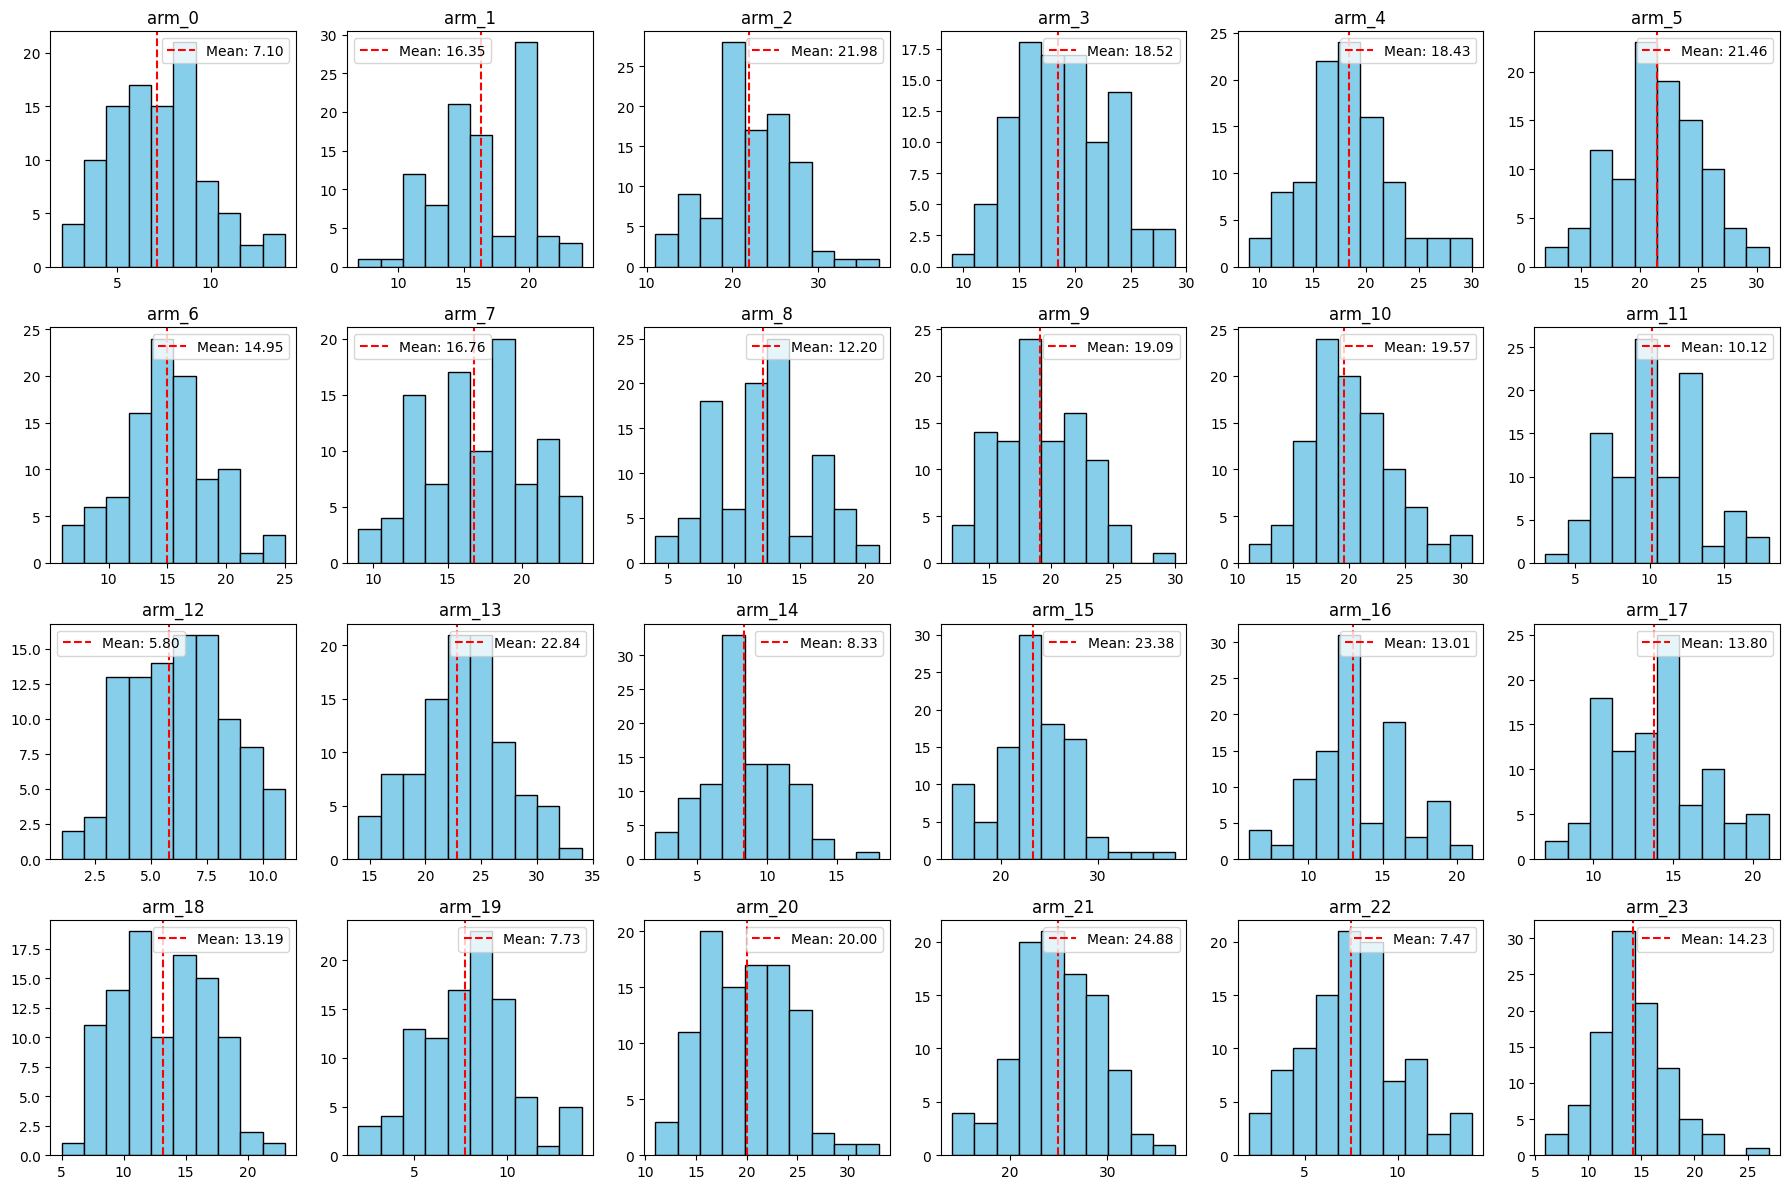

In [15]:
# Create a 4x6 subplot grid
fig, axes = plt.subplots(4, 6, figsize=(18, 12))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through each column in the DataFrame
for i, column in enumerate(df_reward.columns):
    # Plot a histogram for the current column in the corresponding subplot
    axes[i].hist(df_reward[column], bins=10, color='skyblue', edgecolor='black')
    axes[i].set_title(column)  # Set the title of each subplot

    # Calculate the mean of the current column
    mean_value = df_reward[column].mean()
    
    # Plot a red dotted line for the mean value
    axes[i].axvline(x=mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
    axes[i].legend()  # Show the legend
    
# Adjust layout and show the plot
plt.tight_layout()

# plt.title('Histogram for each arm')
plt.show()


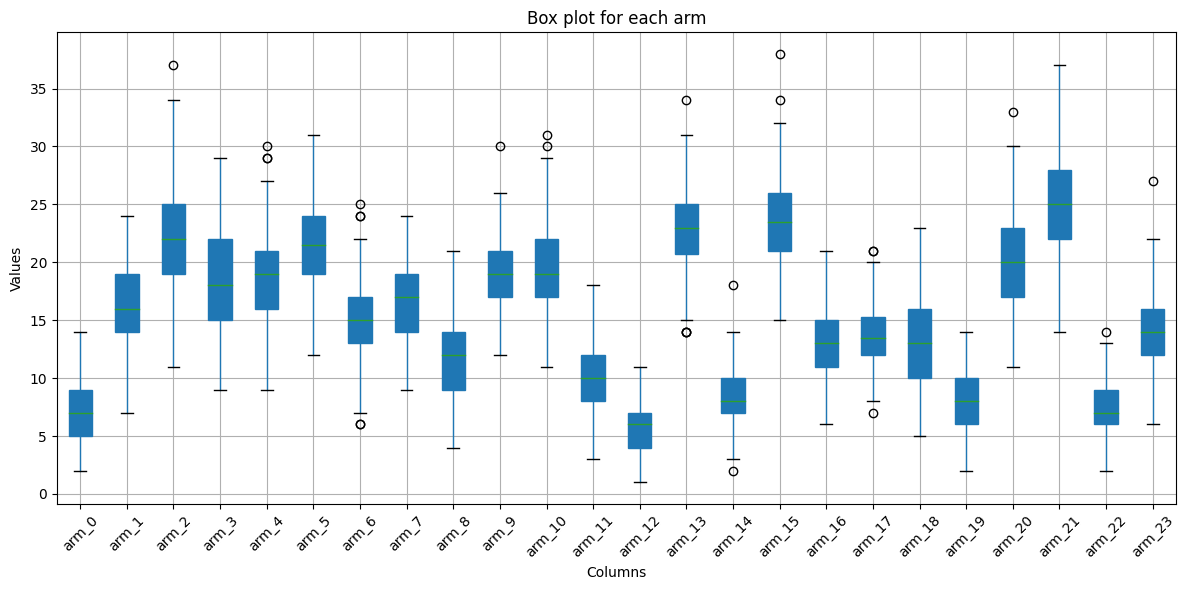

In [13]:
# Plotting box plots for each column
plt.figure(figsize=(12, 6))
df_reward.boxplot(patch_artist=True)
plt.title('Box plot for each arm')
plt.xticks(rotation=45)
plt.xlabel('Columns')
plt.ylabel('Values')
plt.tight_layout()
plt.show()


In [19]:
mean_values = df_reward.mean()

# Convert the mean values to a DataFrame for sorting and printing
mean_df = pd.DataFrame({'Column Name': mean_values.index, 'Mean Value': mean_values.values})

# Sort the DataFrame by 'Mean Value' in descending order
mean_df = mean_df.sort_values(by='Mean Value', ascending=False)

# Display the sorted mean values along with the column names
print(mean_df)

   Column Name  Mean Value
21      arm_21       24.88
15      arm_15       23.38
13      arm_13       22.84
2        arm_2       21.98
5        arm_5       21.46
20      arm_20       20.00
10      arm_10       19.57
9        arm_9       19.09
3        arm_3       18.52
4        arm_4       18.43
7        arm_7       16.76
1        arm_1       16.35
6        arm_6       14.95
23      arm_23       14.23
17      arm_17       13.80
18      arm_18       13.19
16      arm_16       13.01
8        arm_8       12.20
11      arm_11       10.12
14      arm_14        8.33
19      arm_19        7.73
22      arm_22        7.47
0        arm_0        7.10
12      arm_12        5.80


In [20]:
# Perform Shapiro-Wilk test for normality on each column
for column in df_reward.columns:
    # Perform the Shapiro-Wilk test on the current column
    stat, p_value = shapiro(df_reward[column])
    
    # Print the test statistic and p-value for each column
    print(f"Column: {column}, Test Statistic: {stat:.4f}, P-value: {p_value:.4f}")


Column: arm_0, Test Statistic: 0.9654, P-value: 0.0099
Column: arm_1, Test Statistic: 0.9734, P-value: 0.0402
Column: arm_2, Test Statistic: 0.9841, P-value: 0.2711
Column: arm_3, Test Statistic: 0.9830, P-value: 0.2278
Column: arm_4, Test Statistic: 0.9746, P-value: 0.0498
Column: arm_5, Test Statistic: 0.9889, P-value: 0.5778
Column: arm_6, Test Statistic: 0.9835, P-value: 0.2448
Column: arm_7, Test Statistic: 0.9794, P-value: 0.1194
Column: arm_8, Test Statistic: 0.9871, P-value: 0.4456
Column: arm_9, Test Statistic: 0.9821, P-value: 0.1915
Column: arm_10, Test Statistic: 0.9737, P-value: 0.0429
Column: arm_11, Test Statistic: 0.9754, P-value: 0.0585
Column: arm_12, Test Statistic: 0.9732, P-value: 0.0391
Column: arm_13, Test Statistic: 0.9880, P-value: 0.5087
Column: arm_14, Test Statistic: 0.9739, P-value: 0.0441
Column: arm_15, Test Statistic: 0.9735, P-value: 0.0411
Column: arm_16, Test Statistic: 0.9791, P-value: 0.1135
Column: arm_17, Test Statistic: 0.9760, P-value: 0.0642
Co

In [21]:
# mean and standard deviations
means = []
sds = []
for column in df_reward.columns:
    average = df_reward[column].mean()
    sd_value = df_reward[column].std()
    means.append(average)
    sds.append(sd_value)

stats = pd.DataFrame(np.column_stack([means,sds]), columns = ['mean','standard deviation'])
stats

,mean,standard deviation
0,7.10,2.488357
1,16.35,3.331439
2,21.98,4.796842
3,18.52,4.100948
4,18.43,4.015764
5,21.46,3.888392
6,14.95,3.916747
7,16.76,3.587633
8,12.20,3.521937
9,19.09,3.384740


In [26]:
from scipy.stats import shapiro

# Assuming 'df' is your DataFrame with 24 columns

# Initialize lists to store results
significant_results = []
non_significant_results = []

# Perform Shapiro-Wilk test for normality on each column
for column in df_reward.columns:
    # Perform the Shapiro-Wilk test on the current column
    stat, p_value = shapiro(df_reward[column])

    # Check if the p-value is less than 0.05
    if p_value < 0.05:
        # Store significant results together
        significant_results.append(f"Column: {column}, Test Statistic: {stat:.4f}, P-value: {p_value:.4f}")
    else:
        # Store non-significant results together
        non_significant_results.append(f"Column: {column}, Test Statistic: {stat:.4f}, P-value: {p_value:.4f}")

# Print significant results
print(f'There are {len(significant_results)} arms that are not normally distributed') 
print("\n".join(significant_results))
print()  # Empty line between significant and non-significant results

# Print non-significant results
print(f'There are {len(non_significant_results)} arms that are normally distributed') 
print("\n".join(non_significant_results))


There are 11 arms that are not normally distributed
Column: arm_0, Test Statistic: 0.9654, P-value: 0.0099
Column: arm_1, Test Statistic: 0.9734, P-value: 0.0402
Column: arm_4, Test Statistic: 0.9746, P-value: 0.0498
Column: arm_10, Test Statistic: 0.9737, P-value: 0.0429
Column: arm_12, Test Statistic: 0.9732, P-value: 0.0391
Column: arm_14, Test Statistic: 0.9739, P-value: 0.0441
Column: arm_15, Test Statistic: 0.9735, P-value: 0.0411
Column: arm_19, Test Statistic: 0.9741, P-value: 0.0460
Column: arm_20, Test Statistic: 0.9731, P-value: 0.0383
Column: arm_22, Test Statistic: 0.9736, P-value: 0.0421
Column: arm_23, Test Statistic: 0.9635, P-value: 0.0072

There are 13 arms that are normally distributed
Column: arm_2, Test Statistic: 0.9841, P-value: 0.2711
Column: arm_3, Test Statistic: 0.9830, P-value: 0.2278
Column: arm_5, Test Statistic: 0.9889, P-value: 0.5778
Column: arm_6, Test Statistic: 0.9835, P-value: 0.2448
Column: arm_7, Test Statistic: 0.9794, P-value: 0.1194
Column: arm

## Uniform Exploration

In [13]:
#################################################################################################

def uniform_explor(user_group, secret_key, N, tot_rounds):
    cum_reward = 0
    
    cum_result = {
        "round":[],
        "arm_pulled":[],
        "reward":[],
        "cum_reward":[]
    }
    
    # Initialize the result dict with arms and statistics
    result = {idx: {
                    "Arm": idx,
                    "Output_Arm": 0,
                    "N_List": [], # Rewards gotten during Exploration
                    "Reward_List": [], # Rewards obtained throughout rounds
                    "Round_List": [], # Rounds which the arm is pulled,
                    } for idx in range(TOT_MACHINE)
             }
    
    # Calculates the number of rounds left for Exploitation
    cut_off = tot_rounds - (TOT_MACHINE*N)
    
    # If number of rounds for Exploitation <= 0, do not pull
    if cut_off <= 0:
        print("Insufficient Total Rounds")
    
    else:
        arm = 0
        
        for num_round in range(tot_rounds):
            
            # If iterating through Exploration rounds
            if (num_round + 1) <= (TOT_MACHINE*N):
                # Simulate pulling an arm and getting an output
                output = pull(user_group,secret_key,arm)
                
                cum_result["arm_pulled"].append(arm)
                
                print(f"#{num_round}: {output}")
                
                result[arm]["Output_Arm"] = output["Arm"]
                result[arm]["Reward_List"].append(output["Reward"])
                result[arm]["Round_List"].append(num_round)
                
                result[arm]["N_List"].append(output["Reward"])
                
                # Iterate through the machines 
                if arm == (TOT_MACHINE - 1):
                    arm = 0
                else:
                    arm = arm + 1                

            # If Exploration rounds are over, enter Exploitation rounds
            else:              
                # Identify the arm with the highest average Reward value across N_list
                arm = max(result, key=lambda k: sum(result[k]["N_List"]))
                
                # Simulate pulling an arm and getting an output
                output = pull(user_group,secret_key,arm)
                
                cum_result["arm_pulled"].append(arm)
                
                print(f"#{num_round}: {output}")
            
                result[arm]["Output_Arm"] = output["Arm"]
                result[arm]["Reward_List"].append(output["Reward"])
                result[arm]["Round_List"].append(num_round)
            
            cum_reward += output["Reward"]
            
            cum_result["round"].append(num_round + 1)
            cum_result["reward"].append(output["Reward"])
            cum_result["cum_reward"].append(cum_reward)
        
        list_result = [
            {
                **v, 
                "Total_Reward": sum(v["Reward_List"]),
                "Avg_N": sum(v["N_List"]) / len(v["N_List"]),
                "Avg_Reward": sum(v["Reward_List"]) / len(v["Reward_List"])
            } for v in result.values()
        ]
            
        return list_result, cum_result

#################################################################################################


In [14]:
def regret(result, tot_round, cum_result):
    best_result = max(result, key=lambda x:len(x["Reward_List"]))
    
    print(best_result)
    print(f"Best Arm: {best_result['Arm']} with an average reward of {best_result['Avg_Reward']}")
    
    df = pd.DataFrame(cum_result)
    
    df["regret"] = (df["round"]*best_result["Avg_Reward"]) - df["cum_reward"]
    
    plt.plot(df["round"], df["regret"])
    plt.xlabel("No. of Rounds")
    plt.ylabel("Total Regret")
    plt.show()
    
    return df
    

#0: {'Arm': '0', 'NetReward': 838138, 'Pull': 39330, 'Reward': 3}
#1: {'Arm': '1', 'NetReward': 838153, 'Pull': 39331, 'Reward': 15}
#2: {'Arm': '2', 'NetReward': 838178, 'Pull': 39332, 'Reward': 25}
#3: {'Arm': '3', 'NetReward': 838194, 'Pull': 39333, 'Reward': 16}
#4: {'Arm': '4', 'NetReward': 838217, 'Pull': 39334, 'Reward': 23}
#5: {'Arm': '5', 'NetReward': 838230, 'Pull': 39335, 'Reward': 13}
#6: {'Arm': '6', 'NetReward': 838248, 'Pull': 39336, 'Reward': 18}
#7: {'Arm': '7', 'NetReward': 838269, 'Pull': 39337, 'Reward': 21}
#8: {'Arm': '8', 'NetReward': 838284, 'Pull': 39338, 'Reward': 15}
#9: {'Arm': '9', 'NetReward': 838303, 'Pull': 39339, 'Reward': 19}
#10: {'Arm': '10', 'NetReward': 838321, 'Pull': 39340, 'Reward': 18}
#11: {'Arm': '11', 'NetReward': 838331, 'Pull': 39341, 'Reward': 10}
#12: {'Arm': '12', 'NetReward': 838337, 'Pull': 39342, 'Reward': 6}
#13: {'Arm': '13', 'NetReward': 838359, 'Pull': 39343, 'Reward': 22}
#14: {'Arm': '14', 'NetReward': 838368, 'Pull': 39344, '

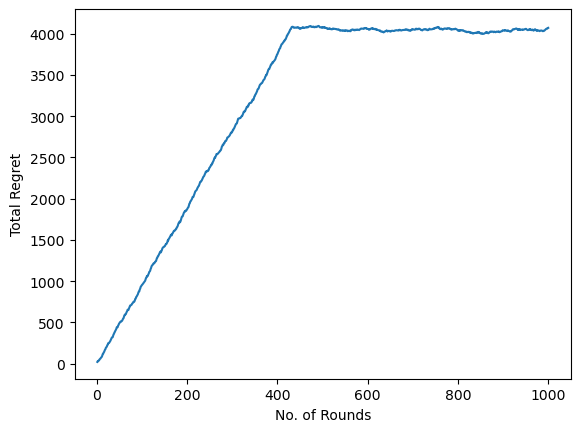

,round,arm_pulled,reward,cum_reward,regret
0,1,0,3,3,21.558020
1,2,1,15,18,31.116041
2,3,2,25,43,30.674061
3,4,3,16,59,39.232082
4,5,4,23,82,40.790102
...,...,...,...,...,...
995,996,21,22,20402,4057.788396
996,997,21,22,20424,4060.346416
997,998,21,25,20449,4059.904437
998,999,21,16,20465,4068.462457


In [16]:
from server_pull import pull

tot_rounds = 1000
N_rounds = 18

result,cum_result = uniform_explor('user40','XEq6wByD', N_rounds, tot_rounds)

print("\n##########################################################################################")
print("Total Runs")
print("##########################################################################################\n")
# for elem in result:
#     print(elem)

print("\n##########################################################################################")
print("Regret Plot")
print("##########################################################################################\n")
result_df = regret(result, tot_rounds, cum_result)

result_df


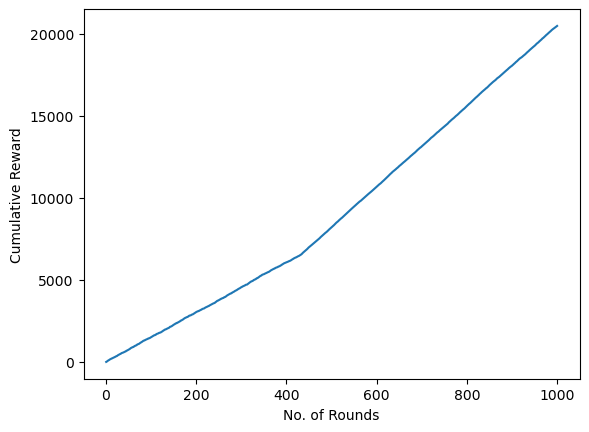

In [20]:
plt.plot(result_df["round"], result_df["cum_reward"])
plt.xlabel("No. of Rounds")
plt.ylabel("Cumulative Reward")
plt.show()

## Epsilon Greedy

In [16]:
# Define epsilon greedy algorithm
def epsilon_greedy(user_group, password, tot_rounds, number_machine, epsilon):
    pull_details = []
    cumulative_reward = 0
    arm_rewards = {i: [] for i in range(number_machine)}

    for num_round in range(1, tot_rounds + 1):
        if random.random() <= epsilon or num_round == 1:
            arm = random.randint(0, number_machine-1)
            print(f"# {num_round}, Exploring Arm {arm}...")
        else:
            avg_rewards = {arm: (sum(rewards) / len(rewards) if rewards else 0) for arm, rewards in arm_rewards.items()}
            arm = max(avg_rewards, key=avg_rewards.get)
            print(f"# {num_round}, Exploiting Arm {arm}...")
        
        output = pull(user_group, password, arm)
        arm_rewards[arm].append(output["Reward"])
        cumulative_reward += output["Reward"]

        pull_details.append({
            "Pull_Number": num_round,
            "Arm_Pulled": arm,
            "Reward": output["Reward"],
            "Cumulative_Reward": cumulative_reward
        })
        
    return pull_details

In [17]:
# Example usage
result = epsilon_greedy('user40', 'XEq6wByD', 1000, 24, 0.3)

if result:
    for pull_info in result:
        print(f"Pull Number: {pull_info['Pull_Number']}, Arm Pulled: {pull_info['Arm_Pulled']}, Reward: {pull_info['Reward']}, Cumulative Reward: {pull_info['Cumulative_Reward']}")

# 1, Exploring Arm 4...
# 2, Exploiting Arm 4...
# 3, Exploiting Arm 4...
# 4, Exploiting Arm 4...
# 5, Exploiting Arm 4...
# 6, Exploiting Arm 4...
# 7, Exploiting Arm 4...
# 8, Exploiting Arm 4...
# 9, Exploring Arm 7...
# 10, Exploiting Arm 4...
# 11, Exploiting Arm 4...
# 12, Exploiting Arm 4...
# 13, Exploiting Arm 4...
# 14, Exploiting Arm 4...
# 15, Exploiting Arm 4...
# 16, Exploiting Arm 4...
# 17, Exploiting Arm 4...
# 18, Exploring Arm 23...
# 19, Exploring Arm 18...
# 20, Exploiting Arm 4...
# 21, Exploiting Arm 4...
# 22, Exploring Arm 22...
# 23, Exploring Arm 18...
# 24, Exploiting Arm 4...
# 25, Exploiting Arm 4...
# 26, Exploiting Arm 7...
# 27, Exploiting Arm 7...
# 28, Exploiting Arm 4...
# 29, Exploring Arm 23...
# 30, Exploiting Arm 4...
# 31, Exploiting Arm 4...
# 32, Exploring Arm 20...
# 33, Exploiting Arm 20...
# 34, Exploring Arm 0...
# 35, Exploiting Arm 20...
# 36, Exploiting Arm 20...
# 37, Exploiting Arm 20...
# 38, Exploiting Arm 20...
# 39, Exploring Arm

In [31]:
arm_rewards = {}
for pull_info in result:
    arm = pull_info['Arm_Pulled']
    reward = pull_info['Reward']
    if arm not in arm_rewards:
        arm_rewards[arm] = []
    arm_rewards[arm].append(reward)

In [32]:
avg_rewards = {arm: sum(rewards) / len(rewards) for arm, rewards in arm_rewards.items()}
best_arm = max(avg_rewards, key=avg_rewards.get)
best_arm_avg_reward = avg_rewards[best_arm]
print(f"Best Arm: {best_arm} with an average reward of {best_arm_avg_reward}")

Best Arm: 21 with an average reward of 24.547385620915033


In [33]:
df['Regret'] = (df['Pull_Number'] * best_arm_avg_reward) - df['Cumulative_Reward']
df

,Pull_Number,Arm_Pulled,Reward,Cumulative_Reward,Regret
0,1,4,24,24,0.547386
1,2,4,23,47,2.094771
2,3,4,15,62,11.642157
3,4,4,23,85,13.189542
4,5,4,17,102,20.736928
...,...,...,...,...,...
995,996,21,21,21621,2828.196078
996,997,21,21,21642,2831.743464
997,998,7,15,21657,2841.290850
998,999,21,21,21678,2844.838235


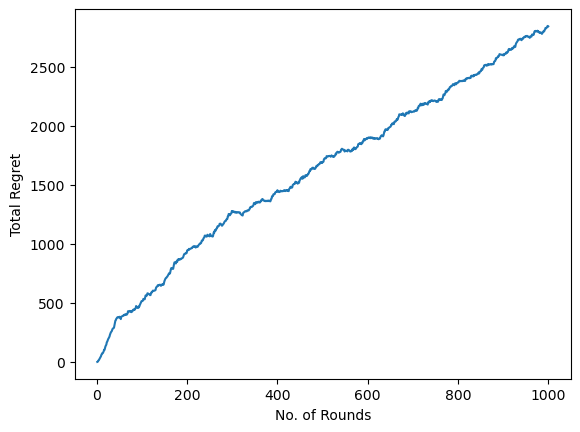

In [67]:
plt.plot(df["Pull_Number"], df["Regret"])
plt.xlabel("No. of Rounds")
plt.ylabel("Total Regret")
plt.show()

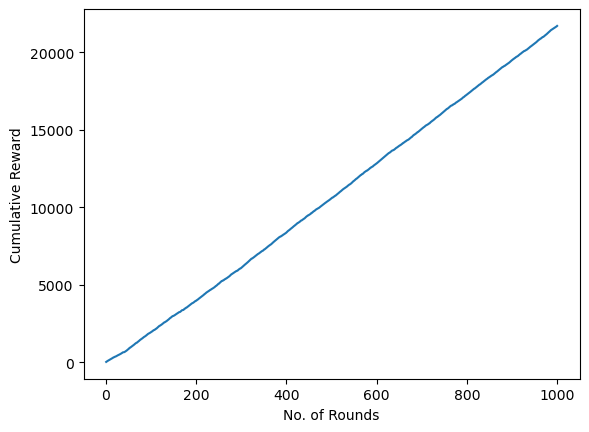

In [69]:
plt.plot(df["Pull_Number"], df["Cumulative_Reward"])
plt.xlabel("No. of Rounds")
plt.ylabel("Cumulative Reward")
plt.show()

## Adaptive Epsilon Greedy (1/T)

In [27]:
def adaptive_epsilon_greedy(user_group, password, given_rounds, exp_bool):
    cum_reward = 0
    
    cum_result = {
        "round":[],
        "arm_pulled":[],
        "reward":[],
        "cum_reward":[]
    }
    
    # Initialize the result dict with arms and statistics
    result = {idx: {
                    "Arm": idx,
                    "Output_Arm": 0,
                    "N_List": [], # Rewards gotten during Exploration
                    "Reward_List": [], # Rewards obtained throughout rounds
                    "Round_List": [], # Rounds which the arm is pulled
                    } for idx in range(TOT_MACHINE)
             }

    # Define the epsilon_t function with exponential decay
    def epsilon_t_exp(t, exp_bool): 
        if exp_bool == True:
            return 1.0 * math.exp(-0.01 * t)
        else:
            return 1/t 
    
    for num_round in range(1, given_rounds):
        current_epsilon = epsilon_t_exp(num_round, exp_bool)

    # Decide for Exploitation / Exploration
    for num_round in range(1, given_rounds):
        current_epsilon = epsilon_t_exp(num_round, exp_bool)
        print(f"Round {num_round}: current_epsilon = {current_epsilon}")

        if random.random() < current_epsilon: # Decide whether to explore or exploit
            arm = random.randint(1, TOT_MACHINE - 1)
            print(f"# {num_round}, Exploring Arm {arm}...")
            
            output = pull(user_group, password, arm) # Simulate pulling an arm and getting an output for exploration
            
            result[arm]["N_List"].append(output["Reward"]) # Append data to N_List for exploration

        # Exploit: choose the best machine so far
        else:
            arm = max(result, key=lambda k: sum(result[k]["Reward_List"]) / len(result[k]["Reward_List"]) if len(result[k]["Reward_List"]) > 0 else 0) # ==> Here is the problem. 
           
            output = pull(user_group, password, arm) # Simulate pulling an arm and getting an output for exploitation
            
            print(f"# {num_round}, Exploiting Arm {arm}...")
            
        cum_result["arm_pulled"].append(arm)
        
        # Append Data
        result[arm]["Output_Arm"] = output["Arm"]
        result[arm]["Reward_List"].append(output["Reward"])
        result[arm]["Round_List"].append(num_round)
        
        cum_reward += output["Reward"]
            
        cum_result["round"].append(num_round)
        cum_result["reward"].append(output["Reward"])
        cum_result["cum_reward"].append(cum_reward)

    list_result = [
        {**v, 
        "Total_Reward": sum(v["Reward_List"]),
        "Avg_N": sum(v["N_List"]) / len(v["N_List"]) if len(v["N_List"]) > 0 else 0, # if len(v["N_List"]) > 0 else 0 추가.
        "Avg_Reward": sum(v["Reward_List"]) / len(v["Reward_List"]) if len(v["Reward_List"]) > 0 else 0 # if len(v["Reward_List"]) > 0 else 0 추가
        } for v in result.values()
    ]
    return list_result, cum_result

###################################################################################################

# Regret Function
def regret(result, given_rounds):
    best_result = max(result, key=lambda x:len(x["Reward_List"]))
    
    print(best_result)
    print(f"Best Arm: {best_result['Arm']} with an average reward of {best_result['Avg_Reward']}")
    
    df = pd.DataFrame(cum_result)
    
    df["regret"] = (df["round"]*best_result["Avg_Reward"]) - df["cum_reward"]
    
    plt.plot(df["round"], df["regret"])
    plt.xlabel("No. of Rounds")
    plt.ylabel("Total Regret")
    plt.show()
    
    return df

Round 1: current_epsilon = 1.0
# 1, Exploring Arm 9...
Round 2: current_epsilon = 0.5
# 2, Exploring Arm 3...
Round 3: current_epsilon = 0.3333333333333333
# 3, Exploiting Arm 9...
Round 4: current_epsilon = 0.25
# 4, Exploiting Arm 9...
Round 5: current_epsilon = 0.2
# 5, Exploiting Arm 9...
Round 6: current_epsilon = 0.16666666666666666
# 6, Exploiting Arm 9...
Round 7: current_epsilon = 0.14285714285714285
# 7, Exploiting Arm 9...
Round 8: current_epsilon = 0.125
# 8, Exploiting Arm 9...
Round 9: current_epsilon = 0.1111111111111111
# 9, Exploring Arm 6...
Round 10: current_epsilon = 0.1
# 10, Exploiting Arm 9...
Round 11: current_epsilon = 0.09090909090909091
# 11, Exploiting Arm 9...
Round 12: current_epsilon = 0.08333333333333333
# 12, Exploiting Arm 9...
Round 13: current_epsilon = 0.07692307692307693
# 13, Exploiting Arm 9...
Round 14: current_epsilon = 0.07142857142857142
# 14, Exploiting Arm 9...
Round 15: current_epsilon = 0.06666666666666667
# 15, Exploiting Arm 9...
Round 

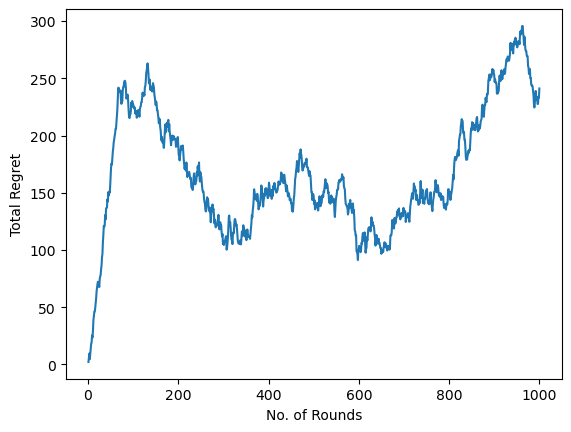

,round,arm_pulled,reward,cum_reward,regret
0,1,9,21,21,2.144086
1,2,3,19,40,6.288172
2,3,9,20,60,9.432258
3,4,9,28,88,4.576344
4,5,9,19,107,8.720430
...,...,...,...,...,...
995,996,13,29,22824,227.509677
996,997,13,23,22847,227.653763
997,998,13,17,22864,233.797849
998,999,13,24,22888,232.941935


In [31]:
given_rounds = 1000

result, cum_result = adaptive_epsilon_greedy("user40", "XEq6wByD", given_rounds + 1, False)

print("\n##########################################################################################")
print("Total Runs")
print("##########################################################################################\n")
# for elem in result:
#     print(elem)

print("\n##########################################################################################")
print("Regret Plot")
print("##########################################################################################\n")
result_df = regret(result, 1000)

result_df

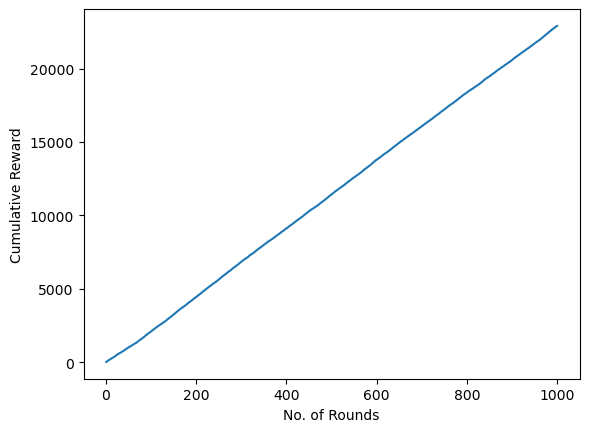

In [32]:
plt.plot(result_df["round"], result_df["cum_reward"])
plt.xlabel("No. of Rounds")
plt.ylabel("Cumulative Reward")
plt.show()

## Adaptive Epsilon Greedy (Exp)

Round 1: current_epsilon = 0.9900498337491681
# 1, Exploiting Arm 0...
Round 2: current_epsilon = 0.9801986733067553
# 2, Exploring Arm 10...
Round 3: current_epsilon = 0.9704455335485082
# 3, Exploring Arm 9...
Round 4: current_epsilon = 0.9607894391523232
# 4, Exploring Arm 4...
Round 5: current_epsilon = 0.951229424500714
# 5, Exploring Arm 19...
Round 6: current_epsilon = 0.9417645335842487
# 6, Exploring Arm 21...
Round 7: current_epsilon = 0.9323938199059483
# 7, Exploring Arm 21...
Round 8: current_epsilon = 0.9231163463866358
# 8, Exploring Arm 10...
Round 9: current_epsilon = 0.9139311852712282
# 9, Exploring Arm 20...
Round 10: current_epsilon = 0.9048374180359595
# 10, Exploring Arm 7...
Round 11: current_epsilon = 0.8958341352965282
# 11, Exploring Arm 20...
Round 12: current_epsilon = 0.8869204367171575
# 12, Exploring Arm 23...
Round 13: current_epsilon = 0.8780954309205613
# 13, Exploring Arm 3...
Round 14: current_epsilon = 0.8693582353988059
# 14, Exploring Arm 18...
R

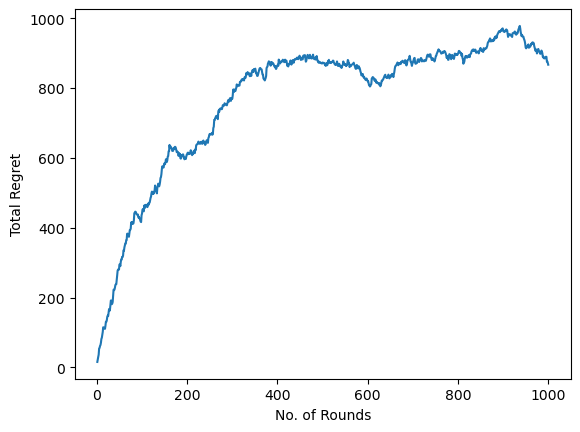

,round,arm_pulled,reward,cum_reward,regret
0,1,0,9,9,15.633819
1,2,10,17,26,23.267637
2,3,9,18,44,29.901456
3,4,4,18,62,36.535274
4,5,19,7,69,54.169093
...,...,...,...,...,...
995,996,21,25,23646,889.283315
996,997,21,38,23684,875.917133
997,998,21,24,23708,876.550952
998,999,21,30,23738,871.184770


In [28]:
given_rounds = 1000

result, cum_result = adaptive_epsilon_greedy("user40", "XEq6wByD", given_rounds + 1, True)

print("\n##########################################################################################")
print("Total Runs")
print("##########################################################################################\n")
# for elem in result:
#     print(elem)

print("\n##########################################################################################")
print("Regret Plot")
print("##########################################################################################\n")
result_df = regret(result, 1000)

result_df

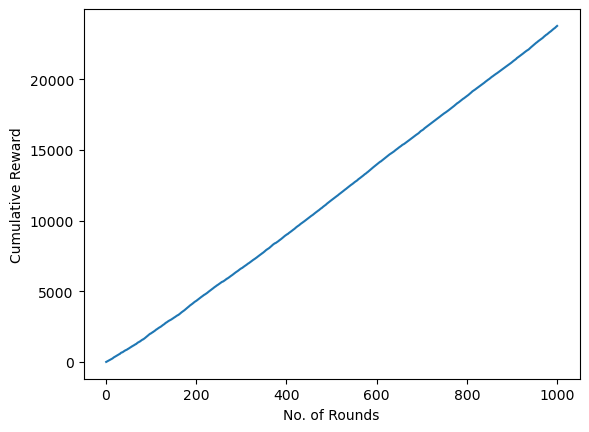

In [29]:
plt.plot(result_df["round"], result_df["cum_reward"])
plt.xlabel("No. of Rounds")
plt.ylabel("Cumulative Reward")
plt.show()

## Upper Confidence Bound (UCB)

In [10]:
class UCBAgent:
    def __init__(self, num_actions):
        self.num_actions = num_actions # number of arms in the machine
        self.q_values = [0] * num_actions # average reward for each arm
        self.action_counts = [0] * num_actions # number of pulls for each arm
        self.total_actions = 0 # total number of pulls
        self.total_rewards = [0] * num_actions # total number of rewards for each arm

    def choose_action(self):
        # use ucb probability to decide arm to pull
        ucb_values = [0] * self.num_actions
        
        for i in range(self.num_actions):
            if self.action_counts[i] == 0:
                # Pull each arm at least once first
                return i
            else:
                # Calculate ucb formula
                exploration_bonus = math.sqrt(2 * math.log(self.total_actions) / self.action_counts[i])
                ucb_values[i] = self.q_values[i] + exploration_bonus

        # pull arm with highest ucb probability
        return ucb_values.index(max(ucb_values))

    def update_q_values(self, action, reward):
        # Append new values from pull for storage
        self.total_actions += 1
        self.action_counts[action] += 1
        self.total_rewards[action] += reward
        self.q_values[action] = self.total_rewards[action] / self.action_counts[action]

        
def regret(reward_list, tot_round):
    # Plot regret function to see when it stabalises
    x = [i for i in range(1, tot_round+1)]
    y = []
    mul_star = max(agent.q_values)
    
    # Graph Plot    
    for num_round in range(1, tot_round+1):        
        round_total = sum(reward_list[0:num_round])
        y.append((mul_star * num_round) - round_total)

    plt.plot(x,y)
    plt.xlabel("No. of Rounds")
    plt.ylabel("Total Regret")
    plt.title(tot_round)
    plt.show()
    
# Function to interact with pull()
def pull1(n):
    result = pull('user40','XEq6wByD',n)
    return result['Reward']

In [11]:
start_time = time.time()

# Example usage
num_actions = 24  # Number of available arms
num_steps = 1000  # Number of steps to simulate
# Create a UCB agent
agent = UCBAgent(num_actions)

# Simulate interactions with the environment and update Q-values

reward_list = [0]*num_steps
for step in range(num_steps):
    # Choose an action
    action = agent.choose_action()

    # Simulate the reward from the chosen action using the pull(n) function
    reward = pull1(action)
    reward_list[step] += reward
    
    # Update Q-values based on the observed reward
    agent.update_q_values(action, reward)

end_time = time.time()
execution_time =   end_time - start_time
print("Execution time:",execution_time)

Execution time: 60.52743697166443


Total reward sum across all arms: 24336 from total of 1000 pulls.
-----------------------------------------------------------
Arm 0: Total Reward = 10,  pulled 1 times, Average Reward = 10.0
Arm 1: Total Reward = 8,  pulled 1 times, Average Reward = 8.0
Arm 2: Total Reward = 17,  pulled 1 times, Average Reward = 17.0
Arm 3: Total Reward = 36,  pulled 2 times, Average Reward = 18.0
Arm 4: Total Reward = 16,  pulled 1 times, Average Reward = 16.0
Arm 5: Total Reward = 19,  pulled 1 times, Average Reward = 19.0
Arm 6: Total Reward = 20,  pulled 1 times, Average Reward = 20.0
Arm 7: Total Reward = 13,  pulled 1 times, Average Reward = 13.0
Arm 8: Total Reward = 15,  pulled 1 times, Average Reward = 15.0
Arm 9: Total Reward = 38,  pulled 2 times, Average Reward = 19.0
Arm 10: Total Reward = 19,  pulled 1 times, Average Reward = 19.0
Arm 11: Total Reward = 11,  pulled 1 times, Average Reward = 11.0
Arm 12: Total Reward = 7,  pulled 1 times, Average Reward = 7.0
Arm 13: Total Reward = 106,  p

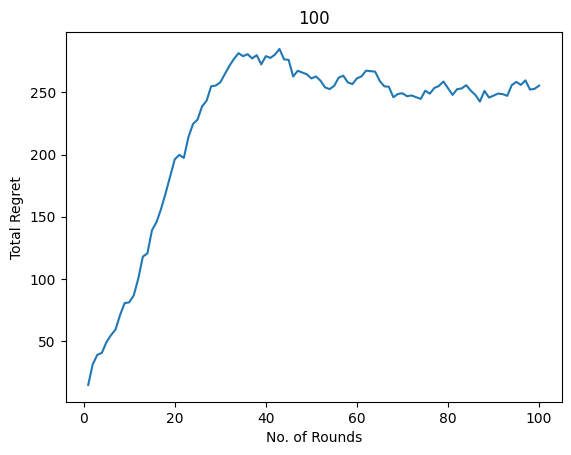

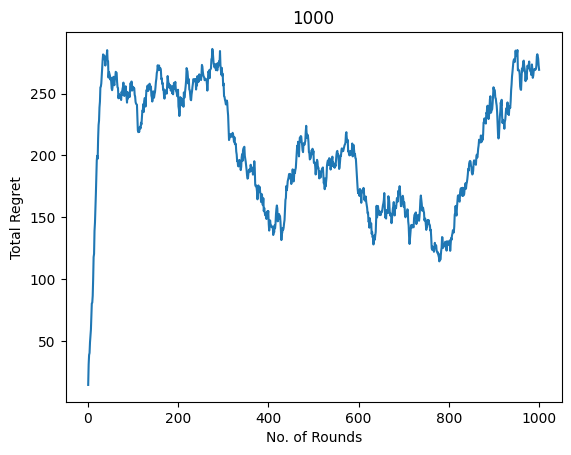

In [13]:
# Calculate total reward sum across all arms
total_reward_sum = sum(agent.total_rewards)
num_pulls_sum = sum(agent.action_counts)

# Print the total reward sum across all arms
print(f"Total reward sum across all arms: {total_reward_sum} from total of {num_pulls_sum} pulls.")
print('-----------------------------------------------------------')

for i in range(num_actions):
    total_reward = agent.total_rewards[i]
    num_pulls = agent.action_counts[i]
    average_reward = total_reward / agent.action_counts[i] if agent.action_counts[i] > 0 else 0
    print(f"Arm {i}: Total Reward = {total_reward},  pulled {num_pulls} times, Average Reward = {average_reward}")

print("\n##########################################################################################")
print("Regret Plot")

regret(reward_list, min(100, num_steps))
regret(reward_list, num_steps)